Interesting things to explore
- Most common words through time
- length of word 
- hue: Democrats vs. Republicans
- hue: 1750-1800, 1800-1850, etc.
- add frequencies
- sentiment
- Clustering of all parties
- Topic modelling

## Importing Classes & Libraries

In [97]:
import pickle
import pandas as pd
from nltk import sent_tokenize
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from project_classes import LemmaTokenizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk 
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import regexp_tokenize
import spacy
import gensim.corpora as corpora
from gensim import corpora, models, similarities, matutils
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

In [2]:
## Defining Functions
nltk.download('stopwords', quiet=True, raise_on_error=True)
stopword_list = set(nltk.corpus.stopwords.words('english'))
tokenized_stop_words = nltk.word_tokenize(' '.join(nltk.corpus.stopwords.words('english')))

In [3]:
tokenizer = ToktokTokenizer()

def remove_stopwords(text):
    # convert sentence into token of words
    all_addresses = []
    for addresses in text:    
        tokens = tokenizer.tokenize(addresses)
        tokens = [token.strip() for token in tokens]
        # check in lowercase 
        t = [token for token in tokens if token.lower() not in stopword_list]
        text=' '.join(t)
        all_addresses.append(text)    
    return pd.Series(all_addresses)

In [4]:
def lemma(text,allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    # Create list to store all addresses in
    all_addresses = []
    for address in text:
        doc = nlp(address)
        t = " ".join([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        all_addresses.append(t)
    return pd.Series(all_addresses)

In [5]:
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
#http://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/counting-and-stemming/
#http://michael-harmon.com/blog/NLP2.html    
#https://stackoverflow.com/questions/26126442/combining-text-stemming-and-removal-of-punctuation-in-nltk-and-scikit-learn
#https://github.com/scikit-learn/scikit-learn/issues/12897

## Import Data

In [6]:
# Load Pickled Dataframe from Cleaning Notebook into a DataFrame
path = r"C:\Users\Andrew\Documents\Metis\NLP_Inaugural_Addresses\Pickled_Files\cleaned_addresses.pkl"

df = pickle.load(open(path,'rb'))
df.head(30)

,president_number,term,pres_name,president_x,address,party,Year,time_period
0,1,1,Washington,01.Washington.1.txt,AMONG the vicissitudes incident to life no eve...,Nonpartisan,1789,pre-1800
1,1,2,Washington,01.Washington.2.txt,I AM again called upon by the voice of my coun...,Nonpartisan,1793,pre-1800
2,2,1,Adams,02.Adams.1.txt,"WHEN it was first perceived, in early times, ...",Federalist,1797,pre-1800
3,3,1,Jefferson,03.Jefferson.1.txt,CALLED upon to undertake the duties of the fi...,Democratic-Republican,1801,1800-1850
4,3,2,Jefferson,03.Jefferson.2.txt,"PROCEEDING, fellow-citizens, to that qualific...",Democratic-Republican,1805,1800-1850
5,4,1,Madison,04.Madison.1.txt,UNWILLING to depart from examples of the most...,Democratic-Republican,1809,1800-1850
6,4,2,Madison,04.Madison.2.txt,ABOUT to add the solemnity of an oath to the o...,Democratic-Republican,1813,1800-1850
7,5,1,Monroe,05.Monroe.1.txt,I SHOULD be destitute of feeling if I was not ...,Democratic-Republican,1817,1800-1850
8,5,2,Monroe,05.Monroe.2.txt,I SHALL not attempt to describe the grateful...,Democratic-Republican,1821,1800-1850
9,6,1,Adams,06.Adams.1.txt,IN compliance with an usage coeval with the e...,Democratic-Republican,1825,1800-1850


## Locating Addtional Stop Words

In [7]:
# Create text array
text = df['address']

In [8]:
# Remove stopwords
text = remove_stopwords(text)

In [9]:
# Lemmatize
text = lemma(text)

In [10]:
# Define Count Vectorizer
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',ngram_range=(1,2),stop_words = 'english')

# call `fit` to build the vocabulary
vectorizer.fit(text)

# finally, call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

In [11]:
# Convert sparse array to numpy array
x_back = x.toarray()

In [12]:
# View word Matrix

pd.DataFrame(x_back, columns=vectorizer.get_feature_names()).head()

,abandon,abandon act,abandon claim,abandon delusion,abandon enemy,abandon government,abandon great,abandon habit,abandon hope,abandon indignantly,...,zealous unceasing,zealously,zealously contend,zealously devote,zealously devoted,zealously enforce,zealously steadily,zealously unite,zone,zone extend
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Determine what are the most common words

sum_words = x.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_words = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_words

[('people', 633),
 ('nation', 509),
 ('great', 421),
 ('government', 393),
 ('make', 357),
 ('country', 352),
 ('power', 339),
 ('world', 327),
 ('time', 275),
 ('citizen', 273),
 ('law', 269),
 ('peace', 256),
 ('man', 250),
 ('good', 246),
 ('new', 246),
 ('right', 244),
 ('public', 228),
 ('duty', 208),
 ('freedom', 192),
 ('free', 191),
 ('war', 190),
 ('year', 176),
 ('life', 167),
 ('hope', 167),
 ('american', 166),
 ('let', 160),
 ('principle', 155),
 ('know', 153),
 ('work', 152),
 ('spirit', 142),
 ('national', 140),
 ('purpose', 136),
 ('high', 134),
 ('come', 134),
 ('long', 133),
 ('liberty', 131),
 ('day', 129),
 ('party', 123),
 ('fellow', 122),
 ('need', 122),
 ('place', 121),
 ('justice', 121),
 ('support', 117),
 ('force', 114),
 ('policy', 114),
 ('seek', 109),
 ('political', 107),
 ('history', 105),
 ('secure', 105),
 ('foreign', 104),
 ('today', 104),
 ('way', 103),
 ('state', 102),
 ('change', 102),
 ('present', 101),
 ('question', 101),
 ('believe', 101),
 ('servi

In [14]:
# Add additional stop words
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['government','people','nation','states', 'make','long','come','day','know','day','way','fellow'
               ,'americans','citizens','united','america','shall','must','may','upon','every','let','one','would','great']
stopwords.extend(newStopWords)

## Analysis

#### NMF Topic Modelling

In [15]:
# Create text array
text = df['address']

In [16]:
# Create vectorizer and fit to text
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = 'english')
doc_word = vectorizer.fit_transform(text)

In [17]:
# Fit and transform NMF
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

(59, 2)

In [18]:
# words in each topic
topic_word = nmf_model.components_
topic_word.shape

(2, 8921)

In [19]:
# Analyze top features to model
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['government', 'people', 'states', 'constitution', 'power', 'country'],
 ['world', 'america', 's', 'new', 'people', 'nation']]

In [20]:
# Add topic to main dataframe
df['topic'] = doc_topic.argmax(axis=1)
df.head()

,president_number,term,pres_name,president_x,address,party,Year,time_period,topic
0,1,1,Washington,01.Washington.1.txt,AMONG the vicissitudes incident to life no eve...,Nonpartisan,1789,pre-1800,0
1,1,2,Washington,01.Washington.2.txt,I AM again called upon by the voice of my coun...,Nonpartisan,1793,pre-1800,0
2,2,1,Adams,02.Adams.1.txt,"WHEN it was first perceived, in early times, ...",Federalist,1797,pre-1800,0
3,3,1,Jefferson,03.Jefferson.1.txt,CALLED upon to undertake the duties of the fi...,Democratic-Republican,1801,1800-1850,0
4,3,2,Jefferson,03.Jefferson.2.txt,"PROCEEDING, fellow-citizens, to that qualific...",Democratic-Republican,1805,1800-1850,0


## Lemmatized (NMF)

In [21]:
# Seperate text from dataframe
text = df['address']

In [22]:
# Remove stopwords
text = remove_stopwords(text)

In [23]:
# Lemmatize
text = lemma(text)

In [24]:
# Create vectorizer and fit to text
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopwords,ngram_range = (1,2),min_df=0.1)
doc_word = vectorizer.fit_transform(text)

In [25]:
# Fit and transform NMF
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

(59, 2)

In [26]:
# words in each topic
topic_word = nmf_model.components_
topic_word.shape

(2, 1643)

In [27]:
# Analyze top features to model
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['power', 'country', 'citizen', 'law', 'duty', 'right'],
 ['world', 'new', 'peace', 'freedom', 'time', 'man']]

In [28]:
# Add topic to main dataframe
df['topic'] = doc_topic.argmax(axis=1)
df.head()

,president_number,term,pres_name,president_x,address,party,Year,time_period,topic
0,1,1,Washington,01.Washington.1.txt,AMONG the vicissitudes incident to life no eve...,Nonpartisan,1789,pre-1800,0
1,1,2,Washington,01.Washington.2.txt,I AM again called upon by the voice of my coun...,Nonpartisan,1793,pre-1800,0
2,2,1,Adams,02.Adams.1.txt,"WHEN it was first perceived, in early times, ...",Federalist,1797,pre-1800,0
3,3,1,Jefferson,03.Jefferson.1.txt,CALLED upon to undertake the duties of the fi...,Democratic-Republican,1801,1800-1850,0
4,3,2,Jefferson,03.Jefferson.2.txt,"PROCEEDING, fellow-citizens, to that qualific...",Democratic-Republican,1805,1800-1850,0


## Lemmatized (LDA)

In [29]:
# Seperate text from dataframe
text = df['address']

In [30]:
# Remove stopwords
text = remove_stopwords(text)

In [31]:
# Lemmatize
text = lemma(text)

In [32]:
# Create count vectorizer
count_vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopwords,ngram_range = (1,2),min_df=0.1)
count_vectorizer.fit(text)

CountVectorizer(min_df=0.1, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                token_pattern='\\b[^\\d\\W]+\\b')

In [33]:
# Create the term-document matrix
# Transpose it so the terms are the rows
doc_word = count_vectorizer.transform(text).transpose()
doc_word

<1643x59 sparse matrix of type '<class 'numpy.int64'>'
	with 24137 stored elements in Compressed Sparse Column format>

In [34]:
# View Dataframe
pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
abandon,0,0,1,1,0,0,0,0,2,0,...,0,0,0,0,0,2,1,0,0,0
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
able,0,0,0,0,1,0,0,2,1,0,...,0,0,1,0,0,0,0,0,0,0
abroad,0,0,1,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0


In [35]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word)

In [36]:
# Map matrix into tokens
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [37]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=5)

In [38]:
lda.print_topics()

[(0,
  '0.010*"law" + 0.008*"country" + 0.007*"public" + 0.006*"power" + 0.006*"good" + 0.006*"right" + 0.006*"duty" + 0.005*"citizen" + 0.005*"well" + 0.005*"interest"'),
 (1,
  '0.011*"power" + 0.010*"country" + 0.008*"citizen" + 0.007*"public" + 0.006*"duty" + 0.006*"interest" + 0.006*"right" + 0.006*"principle" + 0.005*"war" + 0.005*"good"'),
 (2,
  '0.015*"world" + 0.011*"new" + 0.009*"time" + 0.009*"freedom" + 0.008*"man" + 0.008*"peace" + 0.006*"work" + 0.006*"life" + 0.006*"power" + 0.006*"today"')]

In [39]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]
lda_corpus

In [40]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

In [41]:
# Check out the document vectors in the topic space for the first 5 documents
lda_docs[0:5]

[[(0, 0.34602225), (1, 0.65294564)],
 [(0, 0.8405186), (1, 0.14960222)],
 [(1, 0.9987085)],
 [(0, 0.062933095), (1, 0.66080976), (2, 0.27625713)],
 [(1, 0.99690783)]]

## Sentiment Analysis

In [91]:
# Seperate text from dataframe
text = df['address']

In [92]:
# Remove stopwords
text = remove_stopwords(text)

In [93]:
# Lemmatize
text = lemma(text)

In [94]:
# Sentiment Score for Each Address
scores = [SentimentIntensityAnalyzer().polarity_scores(i)['pos'] for i in text]
scores = pd.Series(scores)

In [98]:
# Concat scores with president names
names = df['pres_name']
sent_score = pd.concat([names,scores], axis = 1)
sent_score.head()

,pres_name,0
0,Washington,0.375
1,Washington,0.156
2,Adams,0.395
3,Jefferson,0.375
4,Jefferson,0.308


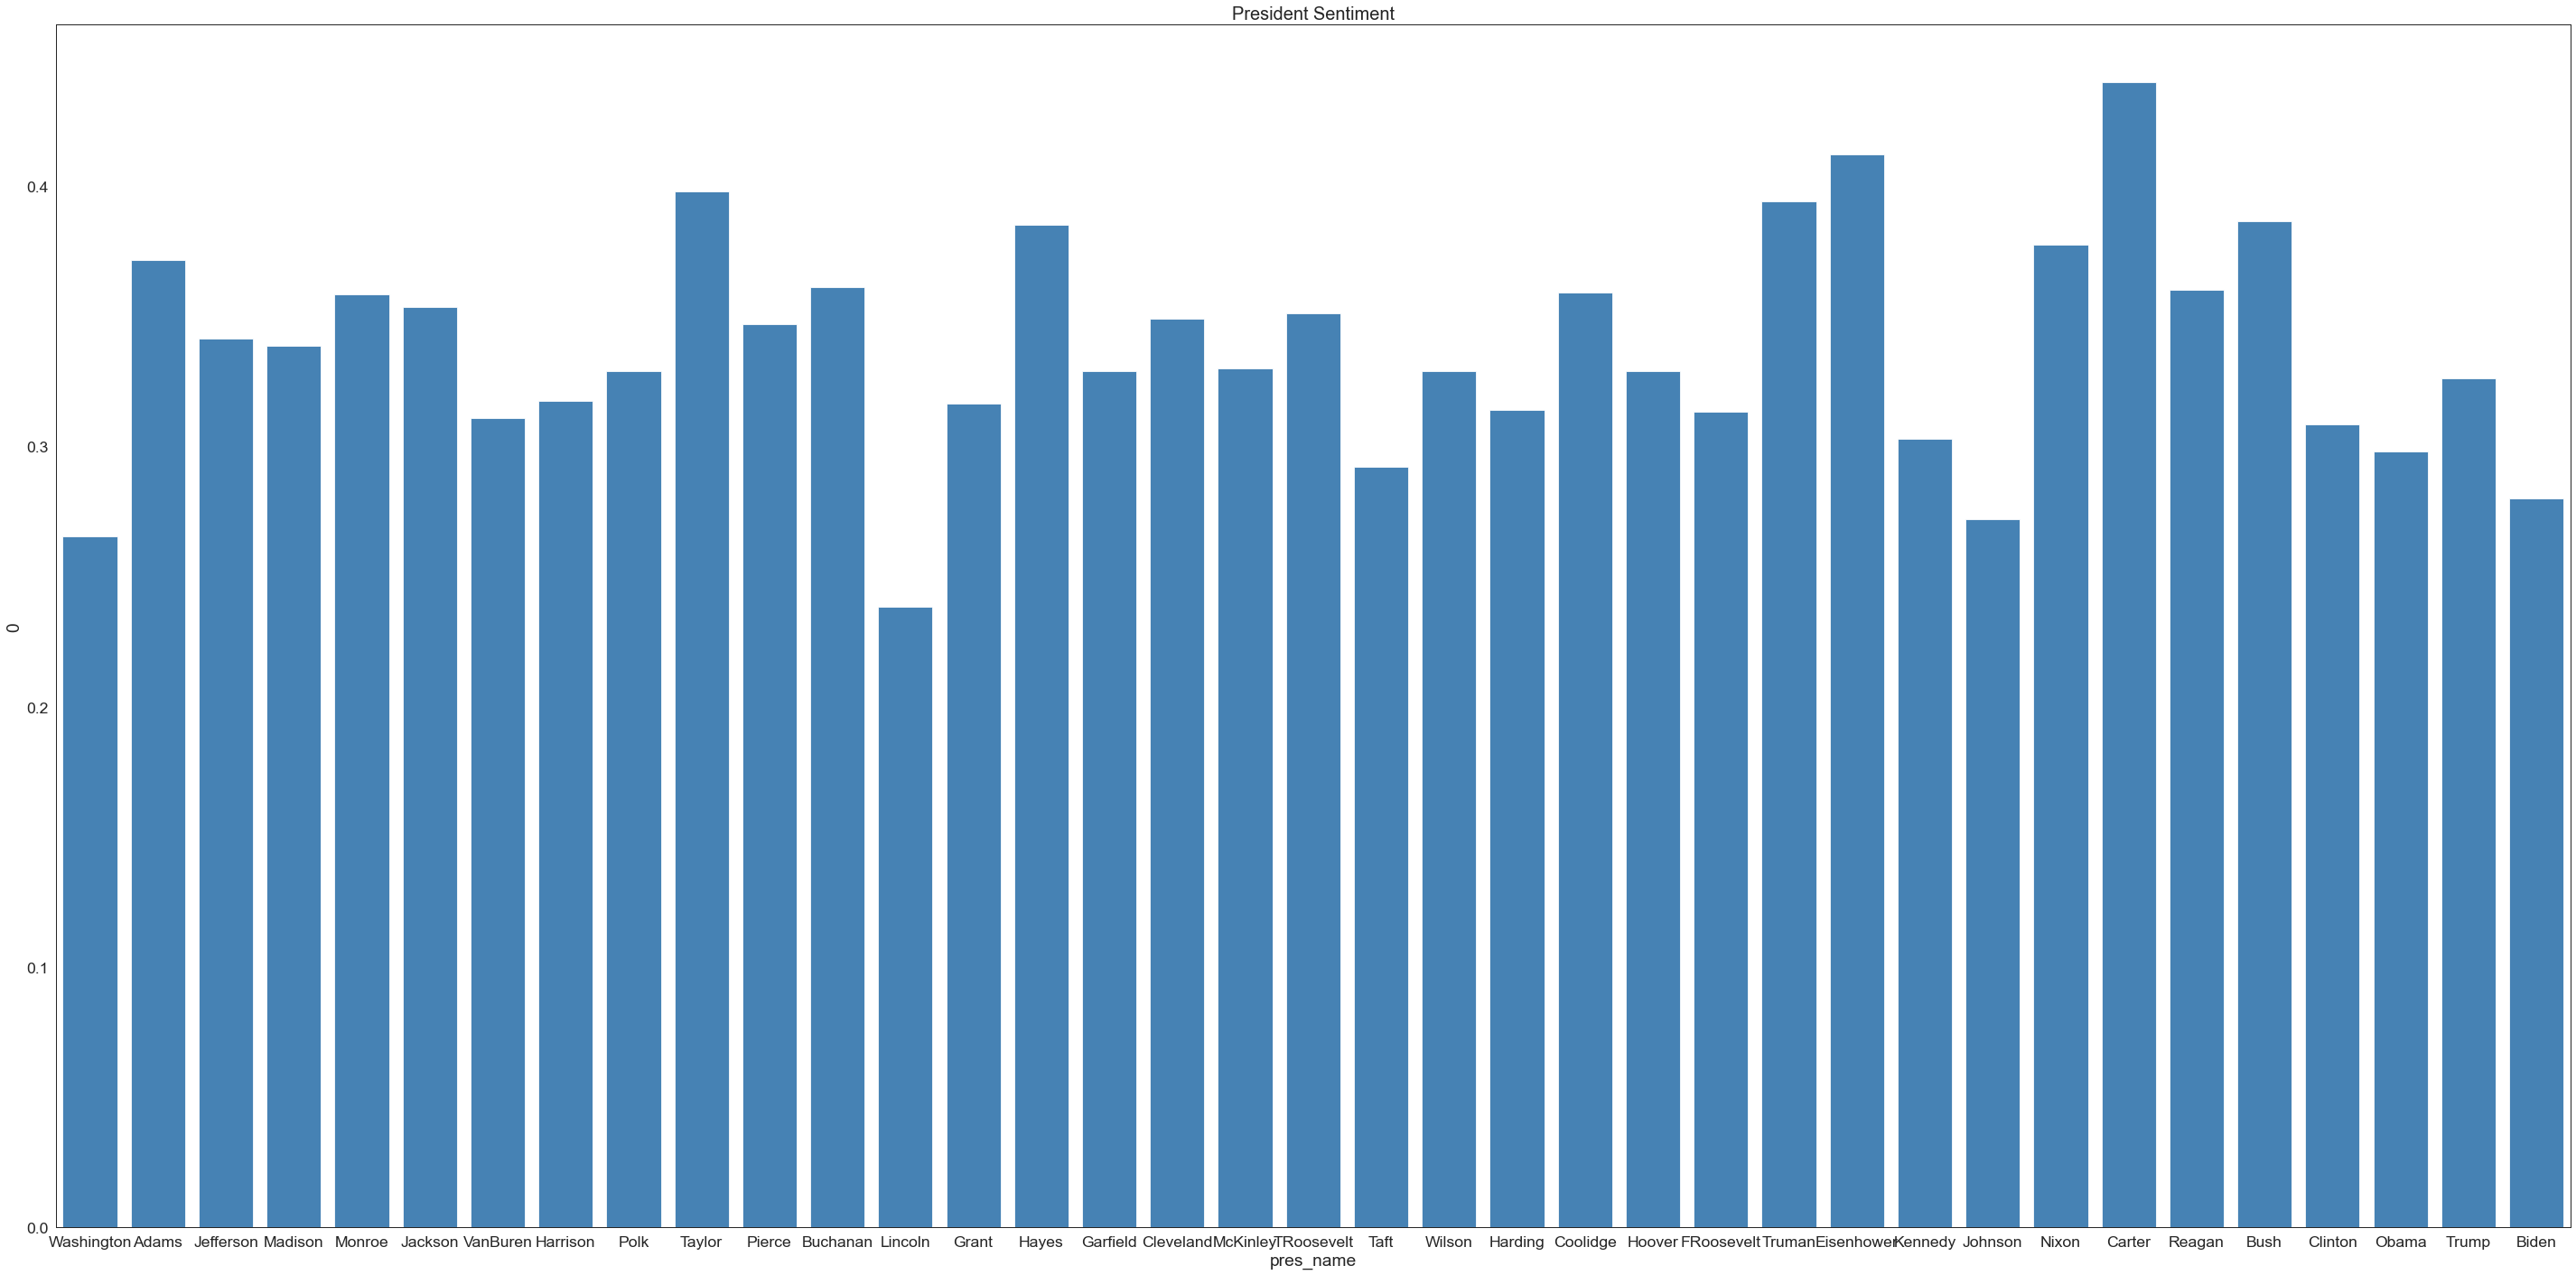

In [106]:
sns.set_context('paper', font_scale = 2)
sns.set_style("white")

f, ax = plt.subplots(figsize = (40, 20))

ax = sns.barplot(x = 'pres_name', y = 0,
            data= sent_score, 
            color = "steelblue",
            capsize = 0.05,
            saturation = 8,
            ci=None
                         )
plt.title('President Sentiment', fontsize = 20)
plt.tight_layout()